# Fake News and Hate Speech Detection

### Model Implemented: Stochastic Gradient Boosting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv(r"C:\Users\aditi\Downloads\new_combined_dataset.csv")

In [3]:
df

,Unnamed: 0,text,label,label_hate_speech,tweet,Updated_label
0,24196,"Donald Trump’s Jet, a Regular on the Campaign ...",0,1,Bitches always think somebody want them or the...,3
1,53179,Coca-Cola and Pepsi Fund 96 U.S. Health Groups...,1,1,@xcorey21 uh you're trash. &#128536;,1
2,2098,Alex Rodriguez’s Orchestrated Move May Not Be ...,0,2,RT @AP: Lifelong Yankee fan puts aside rooting...,3
3,21253,Who Is Sebastian Gorka? A Trump Adviser Comes ...,0,2,RT @Alleycelestine: &#8220;@ViriDoesItt: Kissi...,3
4,19280,Paul Ryan Calls Donald Trump’s Attack on Judge...,0,1,@xloyalTOme - bitch I'm up for sale every week...,3
...,...,...,...,...,...,...
59995,3141,CPAC Straw Poll Finds Overwhelming Support for...,0,1,A lot of dumb bitches out here....,3
59996,19322,Paul Ryan Calls Donald Trump’s Attack on Judge...,0,1,"A hoe gon be a hoe, that ain't a hunnid.",3
59997,37746,NaN,1,1,"Bitch, you may have a million dollar body, but...",1
59998,35670,Obama’s Brother: I’m Voting TrumpPosted on Oct...,1,2,RT @AnnTelnaes: Halloween candy corn bird http...,1


### Exploring Data

In [4]:
df.shape

(60000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         60000 non-null  int64 
 1   text               59100 non-null  object
 2   label              60000 non-null  int64 
 3   label_hate_speech  60000 non-null  int64 
 4   tweet              60000 non-null  object
 5   Updated_label      60000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


In [6]:
df.describe()

,Unnamed: 0,label,label_hate_speech,Updated_label
count,60000.000000,60000.000000,60000.000000,60000.000000
mean,29999.500000,0.500000,1.113333,1.943333
std,17320.652413,0.500004,0.462413,1.026388
min,0.000000,0.000000,0.000000,0.000000
25%,14999.750000,0.000000,1.000000,1.000000
50%,29999.500000,0.500000,1.000000,1.500000
75%,44999.250000,1.000000,1.000000,3.000000
max,59999.000000,1.000000,2.000000,3.000000


In [7]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [8]:
df.drop(df.index[:50000])

,text,label,label_hate_speech,tweet,Updated_label
50000,Pope Francis Tells EU Leaders: Populism Is ’Eg...,0,1,Bij vraag wat is d naam van de engels des dood...,3
50001,HUMA IS JUST ‘ONE OF MY STAFFERS’ AFTER CLOSE ...,1,1,A girl who getting it in school and work.... I...,1
50002,Inmates Take Employees Hostage at a Delaware S...,0,1,Bitch ass people are the first to call someone...,3
50003,The Man Who Loathed Pajamas - The New York Tim...,0,1,@zzzentropy @guynamedjordan bitch boys,3
50004,Report: Lena Dunham Rushed to Hospital From Me...,0,2,RT @BasedChasen: Big 10 been trash for years n...,3
...,...,...,...,...,...
59995,CPAC Straw Poll Finds Overwhelming Support for...,0,1,A lot of dumb bitches out here....,3
59996,Paul Ryan Calls Donald Trump’s Attack on Judge...,0,1,"A hoe gon be a hoe, that ain't a hunnid.",3
59997,NaN,1,1,"Bitch, you may have a million dollar body, but...",1
59998,Obama’s Brother: I’m Voting TrumpPosted on Oct...,1,2,RT @AnnTelnaes: Halloween candy corn bird http...,1


In [9]:
df

,text,label,label_hate_speech,tweet,Updated_label
0,"Donald Trump’s Jet, a Regular on the Campaign ...",0,1,Bitches always think somebody want them or the...,3
1,Coca-Cola and Pepsi Fund 96 U.S. Health Groups...,1,1,@xcorey21 uh you're trash. &#128536;,1
2,Alex Rodriguez’s Orchestrated Move May Not Be ...,0,2,RT @AP: Lifelong Yankee fan puts aside rooting...,3
3,Who Is Sebastian Gorka? A Trump Adviser Comes ...,0,2,RT @Alleycelestine: &#8220;@ViriDoesItt: Kissi...,3
4,Paul Ryan Calls Donald Trump’s Attack on Judge...,0,1,@xloyalTOme - bitch I'm up for sale every week...,3
...,...,...,...,...,...
59995,CPAC Straw Poll Finds Overwhelming Support for...,0,1,A lot of dumb bitches out here....,3
59996,Paul Ryan Calls Donald Trump’s Attack on Judge...,0,1,"A hoe gon be a hoe, that ain't a hunnid.",3
59997,NaN,1,1,"Bitch, you may have a million dollar body, but...",1
59998,Obama’s Brother: I’m Voting TrumpPosted on Oct...,1,2,RT @AnnTelnaes: Halloween candy corn bird http...,1


In [10]:
df['text']=df['text'].apply(str)
df['tweet']=df['tweet'].apply(str)

In [11]:

df.drop("label_hate_speech",inplace = True, axis = 1)
df.drop("label",inplace = True, axis = 1)

In [12]:
df

,text,tweet,Updated_label
0,"Donald Trump’s Jet, a Regular on the Campaign ...",Bitches always think somebody want them or the...,3
1,Coca-Cola and Pepsi Fund 96 U.S. Health Groups...,@xcorey21 uh you're trash. &#128536;,1
2,Alex Rodriguez’s Orchestrated Move May Not Be ...,RT @AP: Lifelong Yankee fan puts aside rooting...,3
3,Who Is Sebastian Gorka? A Trump Adviser Comes ...,RT @Alleycelestine: &#8220;@ViriDoesItt: Kissi...,3
4,Paul Ryan Calls Donald Trump’s Attack on Judge...,@xloyalTOme - bitch I'm up for sale every week...,3
...,...,...,...
59995,CPAC Straw Poll Finds Overwhelming Support for...,A lot of dumb bitches out here....,3
59996,Paul Ryan Calls Donald Trump’s Attack on Judge...,"A hoe gon be a hoe, that ain't a hunnid.",3
59997,nan,"Bitch, you may have a million dollar body, but...",1
59998,Obama’s Brother: I’m Voting TrumpPosted on Oct...,RT @AnnTelnaes: Halloween candy corn bird http...,1


In [13]:
#df["text"] = df["text"] + df["tweet"]

In [14]:
#df["text"][0]

In [15]:
df.drop("tweet",inplace = True, axis = 1)

In [16]:
df

,text,Updated_label
0,"Donald Trump’s Jet, a Regular on the Campaign ...",3
1,Coca-Cola and Pepsi Fund 96 U.S. Health Groups...,1
2,Alex Rodriguez’s Orchestrated Move May Not Be ...,3
3,Who Is Sebastian Gorka? A Trump Adviser Comes ...,3
4,Paul Ryan Calls Donald Trump’s Attack on Judge...,3
...,...,...
59995,CPAC Straw Poll Finds Overwhelming Support for...,3
59996,Paul Ryan Calls Donald Trump’s Attack on Judge...,3
59997,nan,1
59998,Obama’s Brother: I’m Voting TrumpPosted on Oct...,1


In [17]:
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stemmer = PorterStemmer()
sw=set(stopwords.words("english"))

In [20]:
text=df.text

In [21]:
for i in range(0, 5):
    print(text[i])

Donald Trump’s Jet, a Regular on the Campaign Trail, Isn’t Registered to Fly - The New York TimesOver the past several months, Donald J. Trump has crisscrossed the country making dozens of campaign stops in places like Sioux City, Iowa, and Jackson, Miss. often in his sleek Cessna jet. There is just one hitch: The plane’s registration is expired. Records kept with the Federal Aviation Administration show the aircraft’s registration lapsed on Jan. 31. Laura J. Brown, a spokeswoman for the Federal Aviation Administration, confirmed that the plane’s registration was not in good standing and said the owner had not renewed it. With few exceptions, aircraft must be registered in order to fly. Mr. Trump’s plane could be grounded for days, or even months, while the issue is sorted out. In the event of an accident, the company that insures the jet could cite the lapsed registration to decline any claims. The F. A. A. could also fine or assess other penalties against the owner, the operator or b

In [22]:
def preprocess(text_string):
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    parsed_text=re.sub(r'[^\w\s]','',parsed_text)
    return parsed_text

def tokenize(tweet):
    tweet = word_tokenize(tweet)
    return tweet

In [23]:
text_pre_processed=[]

In [24]:
for i in range(0, len(text)):
    text_pre_processed.append(preprocess(text[i]))
    text_pre_processed[i]=tokenize(text_pre_processed[i])
    text_pre_processed[i]=[w.lower() for w in text_pre_processed[i]]
    text_pre_processed[i]=[word for word in text_pre_processed[i] if word.isalpha()]
    text_pre_processed[i]=[w for w in text_pre_processed[i] if not w in sw]

In [25]:
vectorizer= TfidfVectorizer(
    tokenizer=tokenize,
    preprocessor=preprocess,
    ngram_range=(1, 3),
    stop_words=sw,
    use_idf=True,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.75
    )

In [26]:
feat=vectorizer.fit_transform(text).toarray()

C:\Users\aditi\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldve', 'thatll', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.
  warnings.warn(


In [27]:
feat.shape

(60000, 10000)

In [28]:
feat.dtype

dtype('float64')

In [29]:
feat

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.65926004, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [30]:
X = pd.DataFrame(feat)
y=df['Updated_label'].astype(int)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

### Stochastic Gradient Boosting

In [32]:
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf_sgd.fit(X_train, y_train)

C:\Users\aditi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [33]:
acc_sgd = clf_sgd.score(X_test,y_test)
print("Accuracy of Stochastic Gradient Boosting is:",acc_sgd)

Accuracy of Stochastic Gradient Boosting is: 0.9700833333333333


In [34]:
sgd_pred = clf_sgd.predict(X_test)
print(sgd_pred)

[3 1 3 ... 2 1 3]


In [35]:
from sklearn.metrics import classification_report
print("Classification Report of Stochastic Gradient Boosting:\n",classification_report(y_test,sgd_pred))

Classification Report of Stochastic Gradient Boosting:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79       335
           1       0.98      1.00      0.99      5713
           2       0.97      0.36      0.53       373
           3       0.96      1.00      0.98      5579

    accuracy                           0.97     12000
   macro avg       0.97      0.76      0.82     12000
weighted avg       0.97      0.97      0.96     12000



[[ 220  115    0    0]
 [   3 5710    0    0]
 [   0    0  136  237]
 [   0    0    4 5575]]


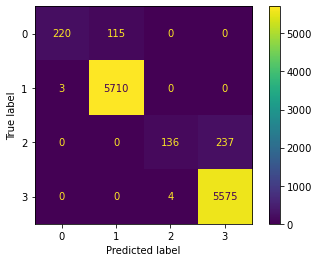

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_sgd = confusion_matrix(y_test,sgd_pred, labels=clf_sgd.classes_)
print(cm_sgd)


disp = ConfusionMatrixDisplay(confusion_matrix=cm_sgd,display_labels=clf_sgd.classes_)
disp.plot()
plt.show()